# Introduction

Image classification serves as a fundamental application in digital image processing, playing a pivotal role in various domains such as medical diagnosis, autonomous vehicles, and facial recognition. As part of our exploration in this Basic Digital Image Processing course, we delve into the potent realm of Multi-Layer Perceptrons (MLPs), a class of artificial neural networks well-suited for learning intricate patterns from data.

In the context of this course, we will navigate the implementation of MLPs for image classification using the widely recognized "Cats vs. Dogs" dataset. This dataset comprises labeled images of cats and dogs, offering an excellent opportunity for binary classification—a fundamental concept in image processing. Starting with the basics, we'll construct a simple MLP to discern between images of cats and dogs. Following this, we will progress to a more nuanced task—multi-class classification—enabling our model to categorize images into various breeds or classes of both cats and dogs.

Throughout this notebook, designed specifically for the Basic Digital Image Processing course, we aim not only to provide practical guidance but also to underscore the versatility and power of MLPs in handling complex image classification tasks. By the conclusion of our exploration, you will have acquired valuable insights into the step-by-step process of implementing image classification with MLPs, laying a solid foundation for your understanding of digital image processing concepts.

Let's embark on this journey by delving into the implementation steps.



In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision.transforms.functional as TF
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score, roc_auc_score, accuracy_score

In [3]:
# Set random seed for reproducibility
torch.manual_seed(42)

# Download Dataset

To load a dataset from Kaggle, you need to follow these general steps:

1. Install Kaggle API:
First, you need to install the Kaggle API by running the following command in your Jupyter Notebook cell:

In [4]:
!pip install kaggle

2. Get Kaggle API Key:
Go to your Kaggle account, click on your profile picture, and go to "Account." Scroll down to the "API" section and click "Create New API Token." This will download a file named kaggle.json. Save this file in a secure location.

3. Upload Kaggle API Key to Colab (if using Google Colab):
If you are using Google Colab, you'll need to upload your Kaggle API key. Run the following code in a cell:

In [5]:
from google.colab import files

# Upload the Kaggle API key file
uploaded = files.upload()

# Move the uploaded file to the correct location
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


4. Download Dataset:
Now, you can use the Kaggle API to download the dataset. Find the dataset on Kaggle, copy the API command from the dataset's page, and run it in a Jupyter Notebook cell. For example:
Here's a simplified example to get you started:

`Example Code`:

```python
  !kaggle datasets download -d username/dataset-name
```


The link of this dataset is : [Cats and Dogs](https://www.kaggle.com/datasets/tongpython/cat-and-dog)
    

In [6]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 96% 209M/218M [00:01<00:00, 146MB/s]
100% 218M/218M [00:01<00:00, 141MB/s]


5. Unzip Dataset:
After downloading, unzip the dataset using the following command:

In [7]:
# Consider that the name of dataset should be change!
!unzip -q cat-and-dog.zip -d .

In [8]:
%ls

cat-and-dog.zip  sample_data/  test_set/  training_set/


Now you can use the extracted dataset for your work.

To load the "Cats vs. Dogs" dataset, you can use the datasets.ImageFolder class from the torchvision library. This class assumes that your dataset is structured with subdirectories for each class (in this case, "cat" and "dog"). The images are expected to be organized as follows:

In [9]:
"""
path/to/dataset
|-- cat
|   |-- cat_image1.jpg
|   |-- cat_image2.jpg
|   |-- ...
|-- dog
|   |-- dog_image1.jpg
|   |-- dog_image2.jpg
|   |-- ...
"""

'\npath/to/dataset\n|-- cat\n|   |-- cat_image1.jpg\n|   |-- cat_image2.jpg\n|   |-- ...\n|-- dog\n|   |-- dog_image1.jpg\n|   |-- dog_image2.jpg\n|   |-- ...\n'

# Transforms in PyTorch

In PyTorch, transforms are a crucial component of the data loading pipeline, allowing for the efficient preprocessing and augmentation of input data. When working with image datasets, transforms are applied to each sample, enabling tasks such as resizing, cropping, normalization, and more.

`Normalization`:
Normalization transforms are used to standardize the pixel values of images, typically by subtracting the mean and dividing by the standard deviation. Normalization helps stabilize the training process and accelerates convergence.

`Resizing and Cropping`:
Transforms can resize images to a uniform size or crop them to a specific aspect ratio. This is essential for ensuring consistency in input dimensions, a requirement for many machine learning models.

`ToTensor`:
The ToTensor transform converts images into PyTorch tensors, the data format compatible with neural networks. This operation is a fundamental step when working with image data in PyTorch.

In the following cell please provide 3 transforms including:
1. resize image to 64*64
2. normalize images
3. convert images to tensor

You can see transforms in pytorch via this link: [pytorch transforms](https://pytorch.org/vision/stable/transforms.html)
And see pytorch datasets and dataloaders via this link: [pytorch datasets and dataloaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)


In [10]:
####################Start Code#####################
# Define data transformations
transform = transforms.Compose([
   transforms.Resize(size=(64,64)),# Resize images
   transforms.ToTensor(),  # Convert images to tensors
   transforms.Normalize(mean=(0.5, 0.5,0.5), std=(0.5,0.5,0.5))   # Normalize pixel values

])

# Replace 'path/to/your/dataset' with the actual path to your dataset
train_dataset_root = '/content/training_set'
test_dataset_root = '/content/test_set'

# Load the Cats vs. Dogs dataset using datasets.ImageFolder
train_dataset = datasets.ImageFolder(root = train_dataset_root,
                                     transform=transform)


test_dataset = datasets.ImageFolder(root = test_dataset_root,
                                    transform=transform)


####################End Code#####################

**Loading Kaggle Dataset with Training and Testing Sets**

In certain scenarios, datasets sourced from platforms like Kaggle may come pre-divided into training and testing subsets. This pre-split structure is advantageous, streamlining the data loading process. In this context, our focus shifts to directly loading the training and testing datasets and subsequently creating data loaders for efficient model training and evaluation.

**Loading Pre-Split Dataset:**

When leveraging a Kaggle dataset with pre-existing divisions, the primary task is to access and load the training and testing subsets separately. This simplifies the process, allowing for a more straightforward setup.

**Data Loaders for Training and Testing:**

With the training and testing datasets in hand, data loaders can be created to facilitate the iterative loading of batches during the respective phases. These loaders play a pivotal role in orchestrating the flow of data to the machine learning model.

Data loaders in PyTorch are utility classes that enable the efficient loading of data in batches during the training and testing phases. They handle tasks such as shuffling the data, batching, and parallelizing data loading processes, optimizing the overall training pipeline.

Please set the batch size to 64.



In [11]:
####################Start Code#####################
train_loader =  DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
####################End Code#######################

Visualizing samples from the train_loader can provide valuable insights into the data and help you ensure that the loading and transformation processes are working as expected. Here's an example of how you can visualize a batch of samples:

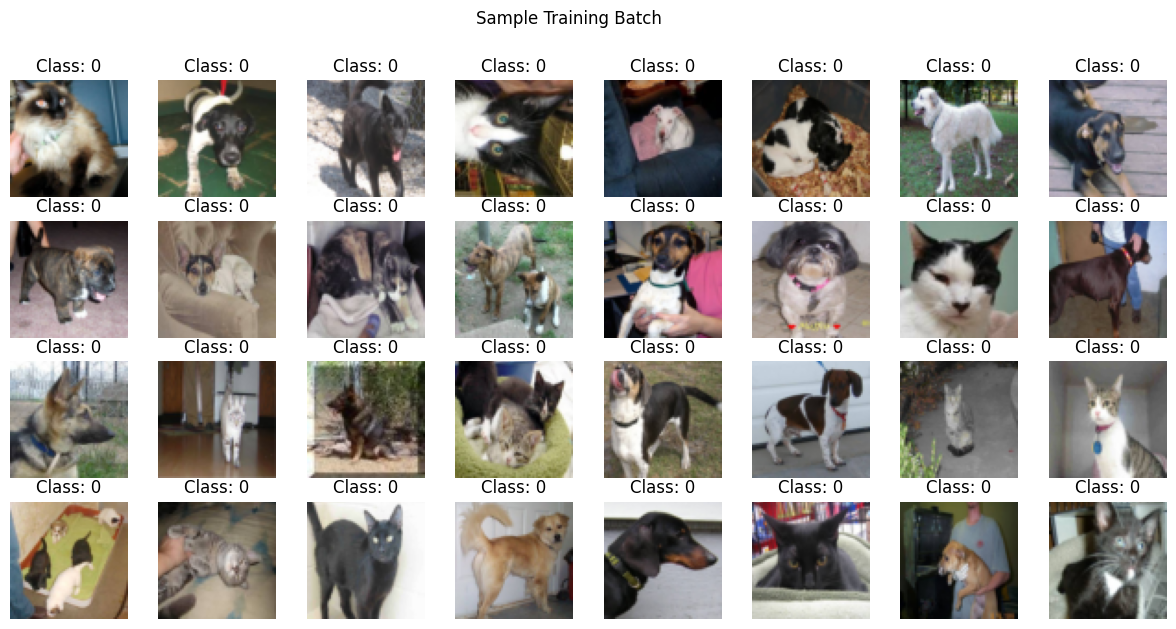

In [12]:
def show_batch(images, labels, title='Sample Batch', rows=4, cols=8, mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]):
  inv_normalize = transforms.Normalize(
      mean=[-m/s for m, s in zip(mean, std)],
      std=[1/s for s in std]
  )

  plt.figure(figsize=(15, 7))

  for i in range(rows * cols):
      plt.subplot(rows, cols, i + 1)
      img = inv_normalize(images[i])
      plt.imshow(TF.to_pil_image(img))
      plt.title(f'Class: {labels[i]}')
      plt.axis('off')

  plt.suptitle(title)
  plt.show()

# Get a batch of training data
sample_batch, sample_labels = next(iter(train_loader))

# Display the batch
show_batch(sample_batch, sample_labels, title='Sample Training Batch', rows=4, cols=8)

# Model Definition

**Multi-Layer Perceptron (MLP) for Binary Classification**

In this section, we focus on constructing an image classifier specifically designed for binary classification tasks using a Multi-Layer Perceptron (MLP). The goal is to create a model that can efficiently distinguish between two classes, making it suitable for applications such as "Cats vs. Dogs" classification.

**Neural Network Architecture:**

Our binary classifier, named BinaryMLPClassifier, employs fully connected layers to capture global relationships within the flattened input images. The output layer utilizes a sigmoid activation function, producing a single probability value between 0 and 1.

**Key Components:**

`Input Layer`: Flattens the preprocessed images into a one-dimensional vector.

`Hidden Layers`: Fully connected layers with non-linear activation functions (e.g., ReLU) to capture complex patterns.

`Output Layer`: A single neuron with a sigmoid activation function for binary classification.

Please define an mlp with two hidden_layers.



In [13]:
class BinaryMLPClassifier(nn.Module):
  def __init__(self, input_size, hidden_size1, hidden_size2):
    super(BinaryMLPClassifier, self).__init__()
    self.flatten = nn.Flatten()
    ####################Start Code#####################
    self.fc1 = nn.Linear(input_size, hidden_size1)
    self.relu1 = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size1, hidden_size2)
    self.relu2 = nn.ReLU()
    self.output_layer = nn.Linear(hidden_size2, 1)
    self.sigmoid = nn.Sigmoid()

    ####################End Code#######################


    ####################Start Code#####################
  def forward(self, x):
    x = self.flatten(x)
    x = self.fc1(x)
    x = self.relu1(x)
    x = self.fc2(x)
    x = self.relu2(x)
    x = self.output_layer(x)
    x=  self.sigmoid(x)

   # x = nn.functional.relu(self.fc1(x))
   #x = nn.functional.relu(self.fc2(x))
    #x = self.output_layer(x)

    ####################End Code#######################
    return x

After define the `BinaryMLPClassifier` class, please define your model with 2 hidden layer with 256 and 128 neurons.

In [14]:
# Assuming input_size is the size of your flattened input (e.g., 3 * 64 * 64 for RGB images)
####################Start Code#####################
binary_mlp_classifier = BinaryMLPClassifier(3 * 64 * 64, 256, 128)
####################End Code#######################
print(binary_mlp_classifier)

BinaryMLPClassifier(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=12288, out_features=256, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (relu2): ReLU()
  (output_layer): Linear(in_features=128, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


# Loss Function and Optimizer

In the realm of training neural networks, two crucial components are the loss function and the optimizer. The loss function quantifies how well the model's predictions align with the actual target values, serving as the guidepost for model improvement during training. The optimizer, on the other hand, dictates how the model's parameters should be adjusted based on the computed loss.

## Implementing Binary Cross Entropy Loss

For our binary classification task, we'll delve into implementing the Binary Cross Entropy Loss—a commonly used loss function for binary classification problems.

### Binary Cross Entropy Loss Formula:

$ \text{BCE Loss} = -\frac{1}{N} \sum_{i=1}^{N} [y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i)] $

Where:
- $ N $ is the number of samples in the batch.
- $ y_i $ is the ground truth label (0 or 1) for the $ i $-th sample.
- $ \hat{y}_i $ is the predicted probability of class 1 for the $ i $-th sample.

## Guidance for Implementation:

To implement the Binary Cross Entropy Loss in PyTorch, follow these steps:

1. **Define the Loss Function Class:**
   Create a class that inherits from `torch.nn.Module`.

2. **Implement the Constructor:**
   In the constructor, you might initialize any necessary parameters or configurations.

3. **Implement the Forward Method:**
   In the `forward` method, compute the binary cross entropy loss based on the formula mentioned above. Remember to handle cases where $ \log(0) $ may occur.

In [16]:
class BinaryCrossEntropyLoss(nn.Module):

  def __init__(self, epsilon=1e-10):
    super(BinaryCrossEntropyLoss, self).__init__()
    self.epsilon = epsilon


  def forward(self, predictions, targets, epsilon=1e-10):
    ####################Start Code#####################
       predictions = torch.clamp(predictions, self.epsilon, 1 - self.epsilon)
       loss = - (targets * torch.log(predictions + 1e-10) + (1 - targets) * torch.log(1 - predictions))
       loss = torch.mean(loss)

    ####################End Code#######################
       return loss


In [17]:
criterion = BinaryCrossEntropyLoss()

## Optimizer Selection

In the training process of neural networks, the optimizer is a critical element that guides the adjustment of model parameters based on the computed loss. The choice of optimizer can significantly impact the training efficiency and convergence of the model. In this section, you are encouraged to explore and choose the optimizer that best suits your specific task and dataset.


**Optimizer Definition**

Feel free to experiment with different optimizers available in PyTorch, such as Stochastic Gradient Descent (SGD), Adam, Adagrad, or RMSprop. Each optimizer comes with its own set of characteristics, and the optimal choice may vary depending on the nature of your dataset and the task at hand.

Useful link : [pytorch optimizers](https://pytorch.org/docs/stable/optim.html)


In [18]:
####################Start Code#####################
# Option 1: Adam optimizer
optimizer_adam = optim.Adam(binary_mlp_classifier.parameters(), lr=0.001)

# Option 2: Stochastic Gradient Descent (SGD) optimizer

####################End Code#######################

# Training Loop

The training loop is where the magic happens—it's the iterative process of presenting batches of data to the model, computing the loss, backpropagating the gradients, and updating the model's parameters. This loop continues for a predefined number of epochs.
## Understanding the Training Loop

- **Set Up the Device:**
  - Determine whether to use a GPU or CPU for computation.
  - Use PyTorch to easily switch between devices.

- **Choose the Optimizer:**
  - Select an optimizer (e.g., Adam, SGD) to update model parameters based on computed gradients.
  - Experiment with different optimizers to observe their impact on training.

- **Training Loop Iterations:**
  - **Zero the Gradients:**
    - Before computing gradients, zero the accumulated gradients from the previous iteration.
  - **Forward Pass:**
    - Pass the input data through the model to obtain predictions.
  - **Compute Loss:**
    - Compare model predictions with ground truth labels to compute the loss.
  - **Backward Pass:**
    - Perform backpropagation to compute gradients of the loss with respect to model parameters.
  - **Update Parameters:**
    - Use the optimizer to update model parameters based on computed gradients.

- **Epoch Monitoring:**
  - After each epoch, monitor and print the training loss to observe its convergence.

- **Repeat for Multiple Epochs:**
  - The entire training loop (from gradients zeroing to parameter updating) is repeated for a specified number of epochs.

- **Final Thoughts:**
  - Adjust hyperparameters (learning rate, optimizer, model architecture) to observe their impact on training.
  - Regularly monitor loss and other metrics to assess model convergence and performance.

This iterative process allows the model to learn from the training dataset and adjust its parameters to improve performance over time.




In [21]:
# Set the device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
binary_mlp_classifier.to(device)

# Training loop
num_epochs = 10
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):

  binary_mlp_classifier.train()
  running_loss = 0.0
  correct_predictions = 0
  total_samples = 0

  for inputs, labels in train_loader:
    inputs, labels = inputs.to(device), labels.to(device)

    # Zero the gradients
    ####################Start Code#####################
    optimizer_adam.zero_grad()
    ####################End Code#######################

    ####################Start Code#####################
    # Forward pass
    outputs = binary_mlp_classifier(inputs)

    # Compute the loss (use your implemented loss function)
    loss = criterion(outputs, labels)
    ####################End Code#######################

    # Backward pass and optimization
    ####################Start Code#####################
    loss.backward()
    optimizer_adam.step()

    ####################End Code#######################

    # Calculate training accuracy
    predicted = (outputs >= 0.5).float()
    correct_predictions += (predicted == labels.view(-1,1)).sum().item()
    total_samples += labels.size(0)
    running_loss += loss.item()


  # Calculate training accuracy and loss
  train_accuracy = correct_predictions / total_samples
  avg_loss = running_loss / len(train_loader)
  train_losses.append(avg_loss)
  train_accuracies.append(train_accuracy)

  print(f"Epoch [{epoch+1}/{num_epochs}] - Train Accuracy: {train_accuracy:.4f} - Train Loss: {avg_loss:.4f}")

Epoch [1/10] - Train Accuracy: 1.0000 - Train Loss: 0.0000
Epoch [2/10] - Train Accuracy: 1.0000 - Train Loss: 0.0000
Epoch [3/10] - Train Accuracy: 1.0000 - Train Loss: 0.0000
Epoch [4/10] - Train Accuracy: 1.0000 - Train Loss: 0.0000
Epoch [5/10] - Train Accuracy: 1.0000 - Train Loss: 0.0000
Epoch [6/10] - Train Accuracy: 1.0000 - Train Loss: 0.0000
Epoch [7/10] - Train Accuracy: 1.0000 - Train Loss: 0.0000
Epoch [8/10] - Train Accuracy: 1.0000 - Train Loss: 0.0000
Epoch [9/10] - Train Accuracy: 1.0000 - Train Loss: 0.0000
Epoch [10/10] - Train Accuracy: 1.0000 - Train Loss: 0.0000


\

```
# This is formatted as code
```

Now we can see the diagrams of train loss and train accuracy.

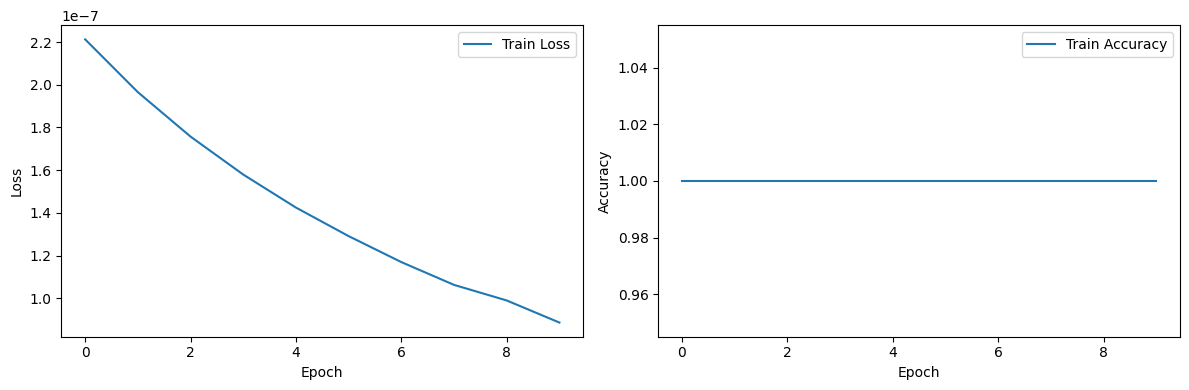

In [22]:
# Plot loss and accuracy curves
plt.figure(figsize=(12, 4))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluation of the Model on Test Dataset

## 1. Set Model to Evaluation Mode:
   Before running evaluations, it's crucial to set the model to evaluation mode using `binary_mlp_classifier.eval()`. This ensures that layers like dropout behave differently during inference compared to training.

## 2. Initialize Variables and Lists:
   Initialize variables to keep track of predictions, true labels, and images for visualization. Lists such as `test_predictions`, `test_true_labels`, and `images_to_show` are used for storing results during the evaluation loop.

## 3. Evaluation Loop:
   Iterate through the test dataset using `test_loader` to evaluate the model on unseen data.
   - **3.1. Forward Pass:**
     Perform a forward pass through the model to obtain predicted outputs (`outputs`) for each input image (`images`).
   - **3.2. Thresholding Predictions:**
     Apply a threshold (0.5) to convert predicted probabilities to binary predictions. This is common for binary classification tasks.

## 4. Store Predictions and True Labels:
   Extend lists with predictions and true labels to aggregate results for further analysis.

## 5. Calculate Metrics on Test Data:
   - **5.1. Confusion Matrix:**
     Use `confusion_matrix` to visualize the performance of the classification algorithm on the test dataset.
   - **5.2. Accuracy Score:**
     Compute the accuracy of the model using `accuracy_score`.
   - **5.3. Classification Report:**
     Generate a detailed classification report, including precision, recall, and F1-score, using `classification_report`.
   - **5.4. F1-Score, Precision, and Recall:**
     Calculate additional metrics such as F1-score, precision, and recall using `f1_score`, `precision_score`, and `recall_score` respectively.

## 6. Print Evaluation Results:
   Display the computed metrics, including the confusion matrix, classification report, accuracy, F1-score, precision, and recall.

## 7. Additional Visualization (Optional):
   If desired, the `images_to_show` list can be used for additional visualization of input images.

## Final Notes:
   - The evaluation metrics provide insights into how well the trained model generalizes to unseen data.
   - The threshold for binary predictions (0.5) can be adjusted based on the specific requirements of the task.
   - Visualization of images can aid in understanding the model's predictions and potential misclassifications.

---

## Understanding Evaluation Metrics

### 1. Confusion Matrix:
   - A confusion matrix is a table that describes the performance of a classification model on a set of data for which the true values are known.
   - It is often used to visualize the number of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).
   - The confusion matrix provides a detailed breakdown of how well the model is performing in terms of correct and incorrect classifications.

### 2. Accuracy Score:
   - Accuracy is a widely used metric that measures the overall correctness of the model.
   - It is calculated as the ratio of the number of correct predictions (TP + TN) to the total number of predictions (TP + TN + FP + FN).
   - Accuracy is a good metric for balanced datasets, but it may not be suitable for imbalanced datasets where one class dominates.

### 3. Classification Report:
   - The classification report is a summary of several important classification metrics, providing a holistic view of model performance.
   - Key metrics in a classification report include precision, recall, F1-score, and support.
   - Precision measures the accuracy of the positive predictions, recall measures the ability of the model to capture all positive instances, and the F1-score is the harmonic mean of precision and recall.
   - Support is the number of actual occurrences of the class in the specified dataset.

### 4. F1-Score:
   - The F1-score is the harmonic mean of precision and recall and provides a balance between the two metrics.
   - It is particularly useful when there is an uneven class distribution or when both precision and recall are important.
   - The F1-score ranges from 0 to 1, where 1 indicates perfect precision and recall.

### 5. Precision:
   - Precision measures the accuracy of positive predictions made by the model.
   - It is calculated as the ratio of True Positives (TP) to the sum of True Positives and False Positives (TP + FP).
   - Precision is important when the cost of False Positives is high.

### 6. Recall (Sensitivity or True Positive Rate):
   - Recall measures the ability of the model to capture all positive instances.
   - It is calculated as the ratio of True Positives (TP) to the sum of True Positives and False Negatives (TP + FN).
   - Recall is important when the cost of False Negatives is high, and capturing all positive instances is crucial.

These metrics collectively provide a comprehensive understanding of a model's performance in classification tasks. When interpreting these metrics, it's important to consider the specific goals and requirements of the given machine learning problem.


In [23]:
binary_mlp_classifier.eval()  # Set the model to evaluation mode

test_predictions = []
test_true_labels = []
images_to_show = []

with torch.no_grad():
  for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    ####################Start Code#####################
    # Forward pass
    outputs = binary_mlp_classifier(images)

    # Get predicted labels
    predicted = torch.round(outputs)
    ####################End Code#######################

    test_predictions.extend(predicted.cpu().numpy())
    test_true_labels.extend(labels.cpu().numpy())
    images_to_show.extend(images.cpu())

# Calculate metrics on test data
####################Start Code#####################
test_confusion_matrix = confusion_matrix(test_true_labels, test_predictions)
test_accuracy_score = accuracy_score(test_true_labels, test_predictions)
test_classification_report = classification_report(test_true_labels, test_predictions)
test_f1_score = f1_score(test_true_labels, test_predictions, average='weighted')
test_precision = precision_score(test_true_labels, test_predictions, average='weighted')
test_recall = recall_score(test_true_labels, test_predictions, average='weighted')
####################End Code#######################


print("Test Confusion Matrix:\n", test_confusion_matrix)
print("Test Classification Report:\n", test_classification_report)
print("Test Accuracy-Score:", test_accuracy_score)
print("Test F1-Score:", test_f1_score)
print("Test Precision:", test_precision)
print("Test Recall:", test_recall)

Test Confusion Matrix:
 [[2023]]
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2023

    accuracy                           1.00      2023
   macro avg       1.00      1.00      1.00      2023
weighted avg       1.00      1.00      1.00      2023

Test Accuracy-Score: 1.0
Test F1-Score: 1.0
Test Precision: 1.0
Test Recall: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Now you can visualize some images and their predictions.

<ipython-input-24-e56e738f200c>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = int(test_predictions[i])


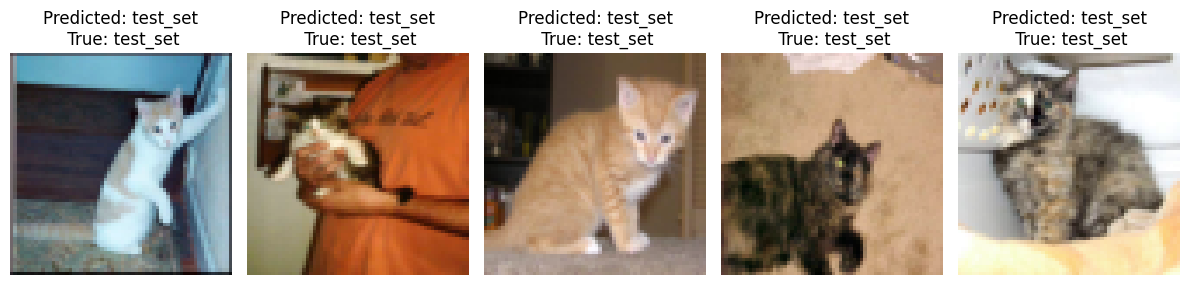

In [24]:
num_images_to_display = 5

plt.figure(figsize=(12, 6))
for i in range(num_images_to_display):
  image = images_to_show[i].permute(1, 2, 0).numpy()

  # Normalize image data to [0, 1] range
  image = (image - image.min()) / (image.max() - image.min())

  predicted_label = int(test_predictions[i])
  true_label = int(test_true_labels[i])
  predicted_class = test_dataset.classes[predicted_label]
  true_class = test_dataset.classes[true_label]

  plt.subplot(1, num_images_to_display, i + 1)
  plt.imshow(image)
  plt.title(f"Predicted: {predicted_class}\n True: {true_class}")
  plt.axis('off')

plt.tight_layout()
plt.show()